#### Kontrol Automatikoa. Klaseko  adibidea

Sistema baten transferentzi funtzioa da: 

$G(s)=\frac{1}{s(1+0.1s)(1+s/200)}$

Kontrolagailu bat diseinatu behar da sistema osoak bete ditzan hurrengo espezifikazioak: 
\begin{gather*}
a: & K_{v}=100\\
b: & FM \ge40^o
\end{gather*}


Egin kontrola diskretu bat, konpentazio sareak erabiliz

#### Ebazpena

Lehengo sartu datuak

In [1]:
s=%s
z=%z

g=1/s/(s+1)/(0.5*s+1);g.dt='c'

Kv=5
FM=40

 s  = 
  s
 z  = 
  z
 g  = 
           1          
   -----------------  
   s +1.5s^2 +0.5s^3  
 Kv  = 
   5.
 FM  = 
   40.


Hasten da prezisioarekin, irabazia konpentsatzeko. 

Jarraituan eta diskretuan irabazia mantentzen denez, jarraitu bezala geinten da, sinplifikatzeko.

1 motako sistema izanik

$ess=\frac 1{K_v}$, $K_v= \lim_{s->0} s G H$

In [3]:
Kv0=horner(s*g,0);

K=Kv/Kv0

 K  = 
   5.


Orain, lagintzea aukeratzen da. Irizpide bat da aztertzea banda zabalera, begizta irekiko Bode diagraman, hurbilduz begizta itxiko abiadura. Aukeratzen da 20 bider azkarrago.

Hori bai, aurrerapen sarea irabilita, sistema azkartuko da (x30 egiten dugu, x20 egin beharrean). 

$T_s$ lortu eta gero, baliokide diskretua lortzen da.

 gz  = 
      0.0003564 +0.0015508z +0.000421z^2     
   ----------------------------------------  
   -0.7165313 +2.412108z -2.6955767z^2 +z^3  


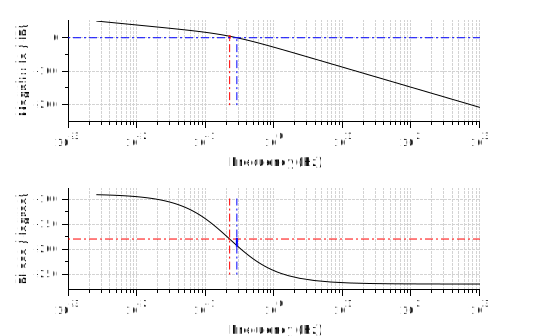

In [10]:
%plot inline //native
show_margins(K*g)
Ts=1/(0.3*30); //

gz=ss2tf(dscr(g,Ts))

Lortzeko behar den FM, $-140^o$ gradu izan behar dira $\omega_{ik}$ irakazi kriktikoko maiztasunean. Nahiko atzeratu behar da banda zabalera.

Horregatik, bi sare erabiliko dira: atzerapena eta aurrerapena. 

Atzerapenarako,$-165^o$ aukeratzen da (FM=$15^o$): $\omega_{ik}=0.16\,2\pi$ (berria)eta jaitsi behar dira $-10$ db.

In [11]:
wik=0.16*2*%pi

a=10^(-10/20)
Ta=1/a/(wik/10)

// Bertsio jarraitua
sarea=(1+a*Ta*s)/(1+Ta*s)

 wik  = 
   1.0053096
 a  = 
   0.3162278
 Ta  = 
   31.455758
 sarea  = 
   1 +9.9471839s  
   -------------  
   1 +31.455758s  


Lortzeko sareraren bertsio diskretua, Tustineko transformatua aplikatzen da

$s=\frac2{T_s}\frac{z-1}{z+1}$

Eta konprobatzen da diseinua, maiztasun eremuan

 sareaz  = 
   -0.3139072 +0.3174333z  
   ----------------------  
       -0.9964739 +z       


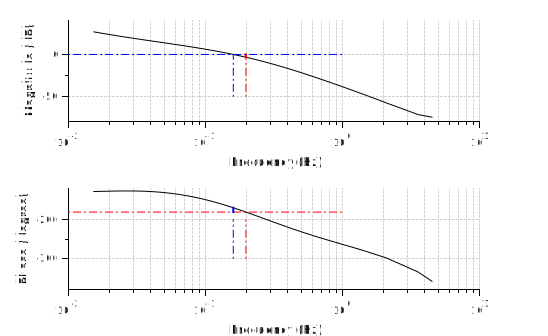

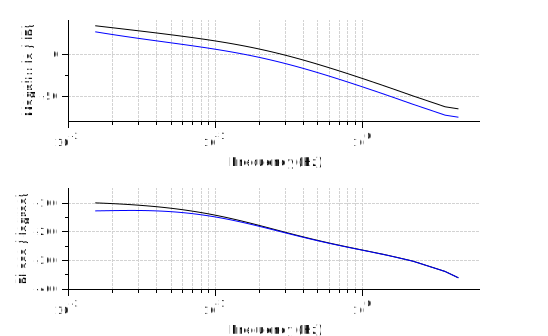

In [18]:
%plot inline //native
sareaz=horner(sarea, 2/Ts*(z-1)/(z+1))
scf(1);clf()
show_margins(K*sareaz*gz)
scf(2);clf()
bode([K*gz;K*gz*sareaz])

Orain bigarren dsiseinua egiten da, aurrerapen sarearekin, igotzeko $30^o$

$b=\frac{1+\sin(\phi)}{1-\sin(\phi)}$

b kalkulatu eta gero,  aztertzen da sarearen eragina moduluan

$10\, log_{10} b $

sarea konpentsazio puntuan ipintzeko

$\omega_{ik}=\frac1{\sqrt{b}T_b}$

Kalkulatzen da sarea, eta bere hurbilketa, lehen bezala.

In [20]:
pha=30*%pi/180;
b=(1+sin(pha))/(1-sin(pha))
disp('Konpentsatzeko ',10*log10(b))

wik=0.21*2*%pi

Tb=1/sqrt(b)/wik

sareb=(1+b*Tb*s)/(1+Tb*s)

sarebz=horner(sareb, 2/Ts*(z-1)/(z+1))

 b  = 
   3.

  "Konpentsatzeko "

   4.7712125
 wik  = 
   1.3194689
 Tb  = 
   0.4375626
 sareb  = 
   1 +1.3126878s  
   -------------  
   1 +0.4375626s  
 sarebz  = 
   -2.549353 +2.7746765z  
   ---------------------  
       -0.7746765 +z      


Orain disenua konprobatzen da, maiztasun eremuan

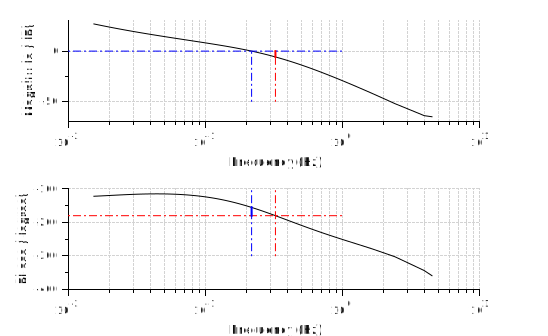

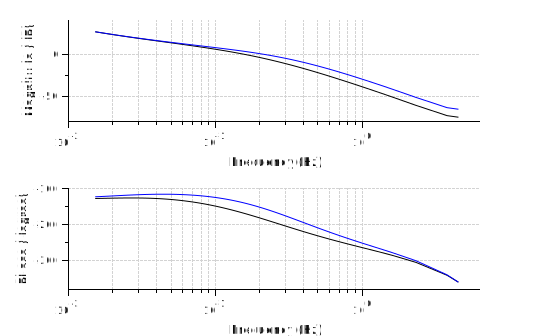

In [22]:
%plot inline //native

scf(1);clf()
show_margins(K*sareaz*sarebz*gz)
scf(2);clf()
bode([K*gz*sareaz;K*gz*sareaz*sarebz])

FM ez da oso ona ... $25^o$. Sistemaren fase aldaketa bortitza da.

Denbora eremuan:

 gitxiaz  = 
      0.0014261 +0.0032111z -0.0097746z^2 +0.0032924z^3 +0.0018542z^4     
   ---------------------------------------------------------------------  
   -0.5516966 +3.1343104z -7.0793489z^2 +7.9616173z^3 -4.4648729z^4 +z^5  
 uitxiaz  = 
   -2.8670578 +15.671296z -34.205936z^2 +37.270005z^3 -20.272181z^4 +4.4038733z^5  
   ------------------------------------------------------------------------------  
       -0.5516966 +3.1343104z -7.0793489z^2 +7.9616173z^3 -4.4648729z^4 +z^5       


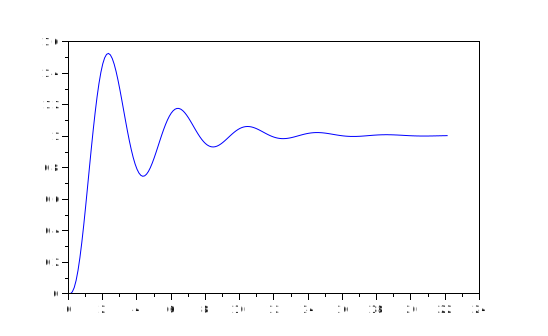

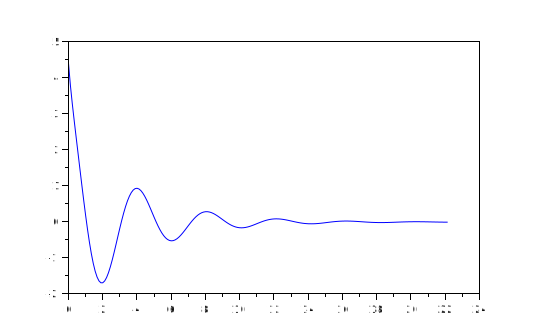

In [23]:
r=ones(1,200);

gitxiaz=(K*sareaz*sarebz*gz)/.(1)
tz=(0:199)*Ts;
yz=dsimul(tf2ss(gitxiaz),r);

scf(1);clf()
plot(tz,yz)


uitxiaz=(K*sareaz*sarebz)/.(gz)
uz=dsimul(tf2ss(uitxiaz),r);
scf(2);clf()
plot(tz,uz)

Emaizat ez denez oso ona, "jolastu" daiteke bi sarrekin , lortzeko emaitza hobea

Saiatu!!